# The following page uses the MostStreamedSpotifySongs2024.csv file from Kraggle

### SOURCE: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

#### Daniel Buddington

I have neither given nor received any unauthorized help on this assignment.

I used AI for 45% of this assignment to help bin the values for the heat map more easily, fix errors in code such as cleaning the data due to the encoding errors causing several data fields to display erroneous values, and navigate and understand the functionality of the imported functions.

In [9]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import numpy as np
SpotifyDf = pd.read_csv('MostStreamedSpotifySongs2024.csv', encoding='cp1252')  # Windows encoding

## The below is code logic to clean the data set for Track, Album Name, and Artists for characters that were generated due to encoding errors when loading the data.

In [11]:
# Define a function to filter for specific unusual characters
def contains_specific_unusual_characters(text):
    # Check for specific characters
    if pd.isnull(text):  # Handle NaN values
        return False
    return any(char in text for char in ["ï", "¿", "½", "ý", "ý"])

cleaned_data = SpotifyDf[~SpotifyDf['Track'].apply(contains_specific_unusual_characters) | 
    SpotifyDf['Album Name'].apply(contains_specific_unusual_characters)]

cleaned_data = cleaned_data[~cleaned_data["Album Name"].str.contains('ý', na=False)]
cleaned_data = cleaned_data[~cleaned_data["Album Name"].str.contains('¿', na=False)]
cleaned_data = cleaned_data[~cleaned_data["Artist"].str.contains('¿', na=False)]


## Here are the names of the columns with their counts that have values as well as the associated data type:

In [13]:
SpotifyDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

## Here are the 2024 Spotify Most Streamed Songs, filtered by the artist "Kendrick Lamar"

In [15]:
filtered_kendrick = cleaned_data[cleaned_data['Artist'] == 'Kendrick Lamar']
filtered_kendrick

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
50,euphoria,euphoria,Kendrick Lamar,4/30/2024,USUG12402839,51,202.1,"168,434,320","17,168","62,516,401",...,77,20.0,"428,378",31.0,"3,156,727","4,843","4,304,870","654,482",NaN,1
200,meet the grahams,meet the grahams,Kendrick Lamar,5/3/2024,USUG12400909,201,107.3,"65,520,394","8,933","15,896,982",...,NaN,7.0,"397,856",22.0,"1,062,564","2,314","1,683,570","185,009",NaN,1
466,HUMBLE.,HUMBLE.,Kendrick Lamar,3/31/2017,USUM71703085,466,71.4,"2,226,869,580","311,766","77,191,099",...,692,111.0,"657,065",94.0,"562,540,114","476,433",NaN,"7,692,756",NaN,1
1195,N95,Mr. Morale & The Big Steppers,Kendrick Lamar,5/13/2022,USUM72208963,"1,194",43.4,"426,936,498","118,020","24,734,503",...,122,21.0,"357,536",45.0,"8,689,010","3,163",NaN,"1,452,569",NaN,1
1310,All The Stars (with SZA),All The Stars (with SZA),Kendrick Lamar,1/4/2018,USUM71713947,"1,304",41.2,"1,638,529,683","207,686","66,120,497",...,39,73.0,"194,391",52.0,"139,392,569","70,103",NaN,"8,746,447",NaN,1
2027,LOVE. FEAT. ZACARI.,DAMN.,Kendrick Lamar,4/14/2017,USUM71703088,"2,014",32.1,"1,343,672,718","207,632","54,635,449",...,NaN,45.0,"235,755",38.0,"466,010,009","134,197",NaN,"5,928,064",NaN,1
2117,Die Hard,Mr. Morale & The Big Steppers,Kendrick Lamar,5/13/2022,USUM72208965,"2,107",31.4,"318,340,376","83,638","10,749,840",...,121,8.0,"116,857",33.0,"11,750,858","3,197",NaN,"1,032,548",NaN,1
2182,Money Trees,"good kid, m.A.A.d city (Deluxe)",Kendrick Lamar,1/1/2012,USUM71210785,"2,167",30.8,"1,476,217,041","352,198","59,811,242",...,7,32.0,"565,677",13.0,"304,362,215","166,654",NaN,"6,010,383",NaN,1
2193,DNA.,DAMN.,Kendrick Lamar,4/14/2017,USUM71703079,"2,184",30.7,"1,157,112,366","185,660","44,429,618",...,63,45.0,"179,785",34.0,"318,401,958","128,722",NaN,"2,244,068",NaN,1


## Here are the 2024 Spotify Most Streamed Songs, filtered by the artist "Billie Eilish"

In [17]:
filtered_billie = cleaned_data[cleaned_data['Album Name'] == 'HIT ME HARD AND SOFT']
filtered_billie

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
12,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401991,13,316.3,"221,636,195","13,800","197,280,692",...,45,138.0,"38,243,636",163.0,"1,354,692","1,219","1,313,357","450,344",NaN,0
18,BLUE,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401996,19,292.6,"91,272,461","6,499","52,287,548",...,1,24.0,"5,054,005",33.0,"283,089",162,"975,891","257,661",NaN,0
40,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401994,41,212.8,"214,237,645","10,871","202,626,837",...,8,67.0,"11,523,335",125.0,"840,442","2,592","1,369,981","285,858",NaN,0
78,CHIHIRO,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401988,79,167.8,"169,410,711","11,028","144,854,768",...,NaN,53.0,"20,737,850",59.0,"521,322",698,"1,680,434","388,625",NaN,0
359,WILDFLOWER,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401993,359,80.8,"100,838,516","5,188","50,795,354",...,5,16.0,"4,083,154",39.0,"294,656",163,"1,075,841","124,583",NaN,0
390,SKINNY,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401995,390,77.3,"77,212,437","4,083","13,850,203",...,2,12.0,"1,198,375",32.0,"226,853",318,"1,687,131","39,163",NaN,0
609,THE GREATEST,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401992,606,61.5,"74,533,081","4,192","13,299,713",...,1,8.0,"208,876",17.0,"183,715",381,"763,697","62,349",NaN,0
786,THE DINER,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401989,790,54.7,"66,101,468","3,693","9,878,576",...,16,5.0,"56,919",9.0,"184,455",248,"685,021","52,008",NaN,0
1073,BITTERSUITE,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401987,"1,066",46.4,"58,810,212","3,394","9,510,078",...,NaN,5.0,"159,005",9.0,"161,908",138,"680,392","104,093",NaN,0


## Below is the cross-tabulation of Album Name and Release Date for the filtered Kendrick Lamar data. It shows the artist-specific album crossed with the year released to show continued popularity of songs over time.

In [19]:
# Convert the "Release Date" column to datetime
filtered_kendrick['Release Date'] = pd.to_datetime(filtered_kendrick['Release Date'], errors='coerce')

# Extract the year from the "Release Date"
filtered_kendrick['Year Bin'] = filtered_kendrick['Release Date'].dt.year

# Create the crosstab
kendrick_cross = pd.crosstab(filtered_kendrick['Album Name'],filtered_kendrick['Year Bin'])
kendrick_cross

C:\Users\danie\AppData\Local\Temp\ipykernel_3196\2298263938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_kendrick['Release Date'] = pd.to_datetime(filtered_kendrick['Release Date'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_3196\2298263938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_kendrick['Year Bin'] = filtered_kendrick['Release Date'].dt.year


Year Bin,2012,2017,2018,2022,2024
Album Name,,,,,
All The Stars (with SZA),0,0,1,0,0
DAMN.,0,3,0,0,0
HUMBLE.,0,1,0,0,0
Mr. Morale & The Big Steppers,0,0,0,6,0
Not Like Us,0,0,0,0,1
The Heart Part 5,0,0,0,1,0
euphoria,0,0,0,0,1
"good kid, m.A.A.d city (Deluxe)",2,0,0,0,0
meet the grahams,0,0,0,0,1


## Below is a cross-tabulation of Album Name and the values for explicit and non-explicit tracks for the album sorted based on the count of total explicit tracks, then filtered to show the top 10.

### The Explicit Track data column is reassigned to be converted to int values to more easily detect them for sorting based on the expected value of 1 for if a track is explicit

In [22]:
# Ensure the 'Explicit Track' column is properly interpreted as a binary (0 or 1)
cleaned_data['Explicit Track'] = cleaned_data['Explicit Track'].astype(int)

data_cross = pd.crosstab(cleaned_data['Album Name'],cleaned_data['Explicit Track'])
data_cross = data_cross.sort_values(by=1, ascending=False)
data_cross.head(10)

Explicit Track,0,1
Album Name,,
UTOPIA,0,15
For All The Dogs,2,13
Her Loss,1,10
WE DON'T TRUST YOU,1,10
HEROES & VILLAINS,0,8
THE TORTURED POETS DEPARTMENT,10,7
Un Verano Sin Ti,10,7
Certified Lover Boy,0,6
Mr. Morale & The Big Steppers,0,6


## All of the following columns that are removed are specific to non-Spotify platforms, and would not contribute to the analysis of the most streamed songs of 2024 on Spotify. All Time Rank, Track Score, and associated artist, album, and track info remain as well.

In [24]:
clean_data_two = cleaned_data.drop(columns=['ISRC','YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach','Apple Music Playlist Count','AirPlay Spins','SiriusXM Spins','Deezer Playlist Count','Deezer Playlist Reach','Amazon Playlist Count','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts','TIDAL Popularity'])

## Check to see if theres any columns that contain NaN data

In [26]:
nan_rows = clean_data_two[clean_data_two.isnull().any(axis=1)]
nan_rows

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Explicit Track
11,The Door,The Door,Teddy Swims,6/14/2024,12,320.2,"111,155,129",2,"263,767",NaN,1
22,Danza Kuduro - Cover,CLUB DE YOKUKIKU YOUGAKU MEDLEY,MUSIC LAB JPN,5/21/2024,23,279.0,"1,655,575,417",10,655,NaN,1
24,Future,Future,official sound studio,1/10/2024,25,277.5,NaN,1,2,NaN,0
29,Numb / Encore,Papercuts,JAY-Z,4/12/2024,30,256.0,"1,003,215,671",128,"485,454",NaN,1
34,Too Sweet,Unreal Unearth: Unheard,Hozier,3/22/2024,35,231.6,"532,012,790","23,557","67,488,850",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4561,"Tu Juliet Jatt Di ( From ""Jatt & Juliet 3"")","Tu Juliet Jatt Di ( From ""Jatt & Juliet 3"")",Diljit Dosanjh,5/24/2024,"4,547",19.5,"1,633,647",160,"2,592,948",NaN,0
4572,TV Shapes,TV Shapes,Bubbatrees,8/19/2022,"4,536",19.5,NaN,3,9,NaN,0
4578,Freezing,Freezing - EP,purpl,2/2/2023,"4,550",19.5,NaN,8,565,1.0,0
4582,DArkSide,DArkSide,Bring Me The Horizon,10/13/2023,"4,544",19.5,"63,083,021","18,060","4,947,020",NaN,1


## The following is used to fill in missing values that exist in columns such as Spotify Streams and Spotify Popularity. Rows for Artist with value's of NaN are removed.

In [28]:
columns_to_clean = ['Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity']
for col in columns_to_clean:
    clean_data_two[col] = clean_data_two[col].fillna(0)
clean_data_two = clean_data_two.dropna(subset=['Artist'])

In [29]:
clean_data_two
clean_data_three = clean_data_two

## The following is a scatter plot showing how spotify streams and track score do not directly correlate

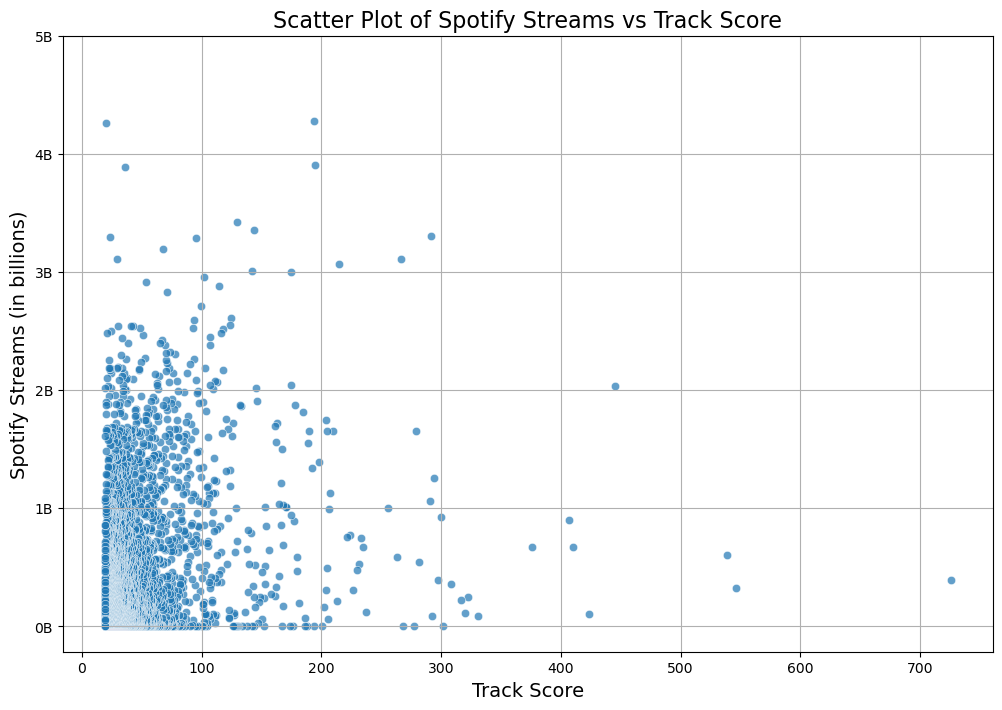

In [31]:
# Convert Spotify Streams and Track Score to numeric (handling commas in Spotify Streams)
clean_data_two['Spotify Streams'] = clean_data_two['Spotify Streams'].replace(',', '', regex=True).astype(float)
clean_data_two['Track Score'] = pd.to_numeric(clean_data_two['Track Score'], errors='coerce')

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clean_data_two, x='Track Score', y='Spotify Streams', alpha=0.7)

# Format y-axis in increments of 1 billion
plt.gca().set_yticks(range(0, int(clean_data_two['Spotify Streams'].max() + 1_000_000_000), 1_000_000_000))
plt.gca().set_yticklabels([f'{int(x/1_000_000_000)}B' for x in plt.gca().get_yticks()])

# Add labels and title
plt.title('Scatter Plot of Spotify Streams vs Track Score', fontsize=16)
plt.xlabel('Track Score', fontsize=14)
plt.ylabel('Spotify Streams (in billions)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


## The following scatter plot shows how Spotify Popularity and Track Score do not strongly correlate 

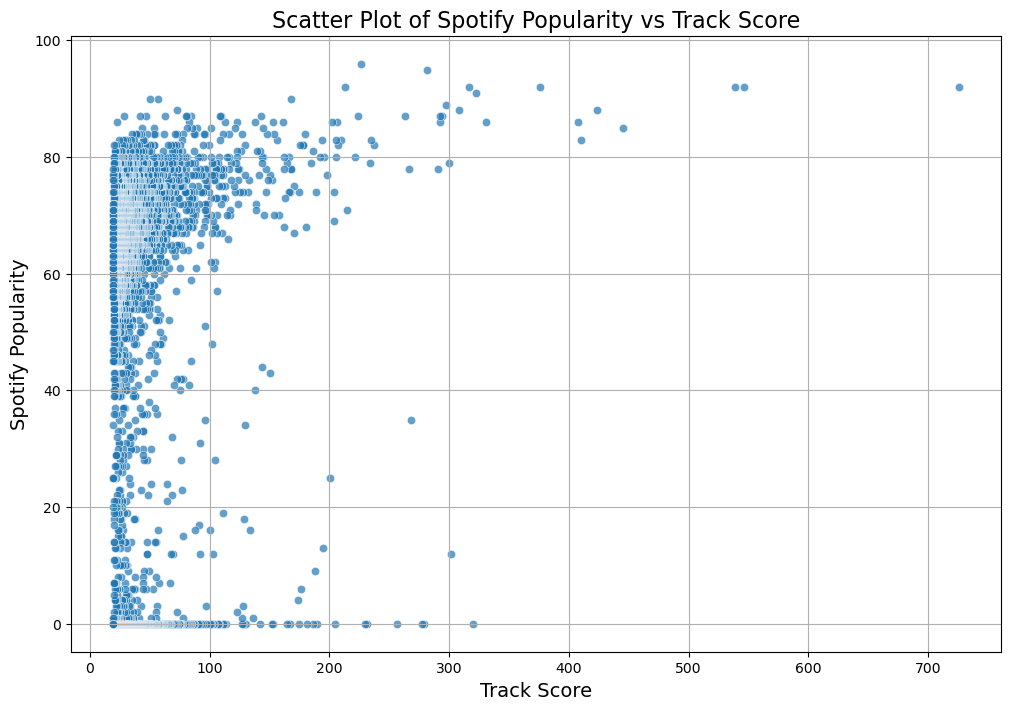

In [33]:

# Convert Spotify Popularity and Track Score to numeric (handling commas in Spotify Popularity if needed)
clean_data_two['Spotify Popularity'] = pd.to_numeric(clean_data_two['Spotify Popularity'], errors='coerce')
clean_data_two['Track Score'] = pd.to_numeric(clean_data_two['Track Score'], errors='coerce')

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clean_data_two, x='Track Score', y='Spotify Popularity', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Spotify Popularity vs Track Score', fontsize=16)
plt.xlabel('Track Score', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


## The following is a heatmap comparing the Spotify Popularity vs Track score with intensity of values increased based on Spotify Stream Count

C:\Users\danie\AppData\Local\Temp\ipykernel_3196\1833031411.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = clean_data_two.pivot_table(


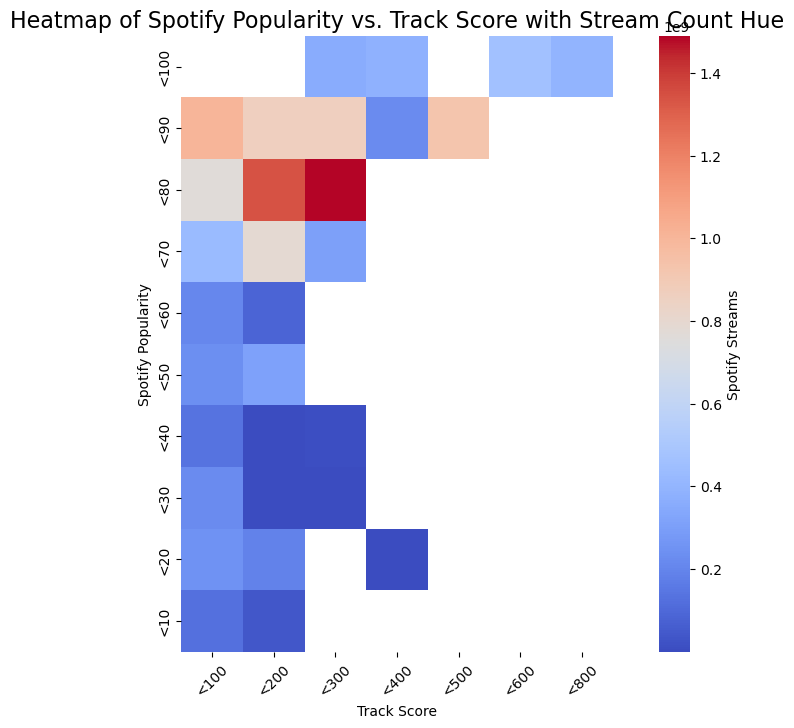

In [35]:
# Convert columns to numeric (handle commas in Spotify Streams)
clean_data_two['Spotify Streams'] = clean_data_two['Spotify Streams'].replace(',', '', regex=True).astype(float)
clean_data_two['Spotify Popularity'] = pd.to_numeric(clean_data_two['Spotify Popularity'], errors='coerce')
clean_data_two['Track Score'] = pd.to_numeric(clean_data_two['Track Score'], errors='coerce')

# Bin Track Score into intervals of 100 and relabel bins
track_score_bins = range(0, int(clean_data_two['Track Score'].max() + 100), 100)
clean_data_two['Track Score Binned'] = pd.cut(
    clean_data_two['Track Score'], 
    bins=track_score_bins, 
    labels=[f"<{x}" for x in track_score_bins[1:]]
)

# Bin Spotify Popularity into intervals of 10 and relabel bins
popularity_bins = range(0, int(clean_data_two['Spotify Popularity'].max() + 10), 10)
clean_data_two['Spotify Popularity Binned'] = pd.cut(
    clean_data_two['Spotify Popularity'], 
    bins=popularity_bins, 
    labels=[f"<{x}" for x in popularity_bins[1:]]
)

# Create a pivot table for the heatmap
heatmap_data = clean_data_two.pivot_table(
    index='Spotify Popularity Binned',
    columns='Track Score Binned',
    values='Spotify Streams',
    aggfunc='mean'
)

# Sort both axes to ensure correct order
heatmap_data = heatmap_data.sort_index(ascending=False)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    cbar_kws={'label': 'Spotify Streams'},
    square=True
)

# Add labels and title
plt.title('Heatmap of Spotify Popularity vs. Track Score with Stream Count Hue', fontsize=16)
plt.xlabel('Track Score')
plt.ylabel('Spotify Popularity')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


## The following are correlations between columns: "Spotify Popularity", "Track Score", and "Spotify Streams" in the data

In [37]:
firstCorrelation = clean_data_two["Spotify Popularity"].corr(clean_data_two["Track Score"])
print(f"The percentage of correlation between Spotify Popularity and Track Score is: {firstCorrelation:.2f}")

secondCorrelation = clean_data_two["Spotify Popularity"].corr(clean_data_two["Spotify Streams"])
print(f"The percentage of correlation between Spotify Popularity and Spotify Streams is: {secondCorrelation:.2f}")

thirdCorrelation = clean_data_two["Track Score"].corr(clean_data_two["Spotify Streams"])
print(f"The percentage of correlation between Track Score and Spotify Streams is: {thirdCorrelation:.2f}")

The percentage of correlation between Spotify Popularity and Track Score is: 0.12
The percentage of correlation between Spotify Popularity and Spotify Streams is: 0.37
The percentage of correlation between Track Score and Spotify Streams is: 0.24


## NUMPY Assigning a Panda DF to an Numpy Array, Checking Type, Dimensions, Shape, and Displaying the Array

In [39]:
clean_data_three['Spotify Streams'] = clean_data_three['Spotify Streams'].replace(',', '', regex=True).astype(float)
clean_data_three['Spotify Playlist Count'] = clean_data_three['Spotify Playlist Count'].replace(',', '', regex=True).astype(float)
NumPySet = clean_data_three.to_numpy()

In [40]:
NumPySet.dtype


dtype('O')

In [41]:
type(NumPySet)

numpy.ndarray

In [42]:
NumPySet.ndim

2

In [43]:
NumPySet.shape

(4008, 13)

In [44]:
NumPySet

array([['MILLION DOLLAR BABY', 'Million Dollar Baby - Single',
        'Tommy Richman', ..., 0, '<800', '<100'],
       ['Not Like Us', 'Not Like Us', 'Kendrick Lamar', ..., 1, '<600',
        '<100'],
       ['i like the way you kiss me', 'I like the way you kiss me',
        'Artemas', ..., 0, '<600', '<100'],
       ...,
       ['Dil Meri Na Sune', 'Dil Meri Na Sune (From "Genius")',
        'Atif Aslam', ..., 0, '<100', '<60'],
       ['Grace (feat. 42 Dugg)', 'My Turn', 'Lil Baby', ..., 1, '<100',
        '<70'],
       ['Nashe Si Chadh Gayi', 'November Top 10 Songs', 'Arijit Singh',
        ..., 0, '<100', '<70']], dtype=object)

### Below the sum function and slice function on a column to show that only around a third of the played songs in the Spotify 2024 Top Played Songs are Expicit in Content

In [46]:

ExplicitSum = np.sum(NumPySet[:,10])
print(f"The total number of explicit songs in the 2024 Spotify Top Played Songs is: {ExplicitSum}")

The total number of explicit songs in the 2024 Spotify Top Played Songs is: 1480


### Below I use a division arithmetic operation to further analyze the above statistic to confirm it is around 1/3 of songs

In [48]:
TotalSongCount = NumPySet.shape[0]
PercentageExplicit = ExplicitSum/TotalSongCount
print(f" The percentage of explicit songs in the Spotify 2024 Top Song Chart is {PercentageExplicit:.0%}")

 The percentage of explicit songs in the Spotify 2024 Top Song Chart is 37%


### Below the standard deviation and slice function is to show that the standard amount of deviation in Spotify 2024 Most Popular Song Streams, this shows that the values are not typically close to each other for the entire dataset to convey that Artists, Albums, and Tracks that are at the top end heavily skew this data as entries at the bottom do not have such a deviation between each other.

In [50]:
StandardDevPopularity = np.std(NumPySet[:,6])
print(f"The amount of standard deviation in song streams between the top songs for 2024 Spotify is: {StandardDevPopularity:.0f} stream counts")

The amount of standard deviation in song streams between the top songs for 2024 Spotify is: 550151790 stream counts


## Below I sliced the max value from the Spotify Streams Column to show the top value and reason for the data skewing the standard deviation between song streams is due to the top song streams

In [52]:
most_streams = np.max(NumPySet[:, 6])
print(f"The most streams reached on a single song in 2024 on Spotify is {most_streams:0.0f}")

The most streams reached on a single song in 2024 on Spotify is 4281468720


## I have determined that the data does not support a third dimension as there is no third dimension in which we want to explore depth, this seems to be as if we had the data other services reported and their equivalent scores that contribute based on their listening stats

### Below is a mask filtering the Popularity Score column in the array using greater than or equal to 80 to set the minimum popularity score of the data returned to be at least 80

In [55]:
Popularity_mask = NumPySet[:,9] >= 80
filtered_set = NumPySet[Popularity_mask]
filtered_set

array([['MILLION DOLLAR BABY', 'Million Dollar Baby - Single',
        'Tommy Richman', ..., 0, '<800', '<100'],
       ['Not Like Us', 'Not Like Us', 'Kendrick Lamar', ..., 1, '<600',
        '<100'],
       ['i like the way you kiss me', 'I like the way you kiss me',
        'Artemas', ..., 0, '<600', '<100'],
       ...,
       ['TiK ToK', 'TiK ToK', 'Kesha', ..., 0, '<100', '<80'],
       ['Sundress', 'Sundress', 'A$AP Rocky', ..., 1, '<100', '<80'],
       ['From The Start', 'Bewitched', 'Laufey', ..., 0, '<100', '<90']],
      dtype=object)

### The bar chart below lists the total count of songs by artist for the most streamed songs for Spotify 2024

C:\Users\danie\AppData\Local\Temp\ipykernel_3196\3683748001.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


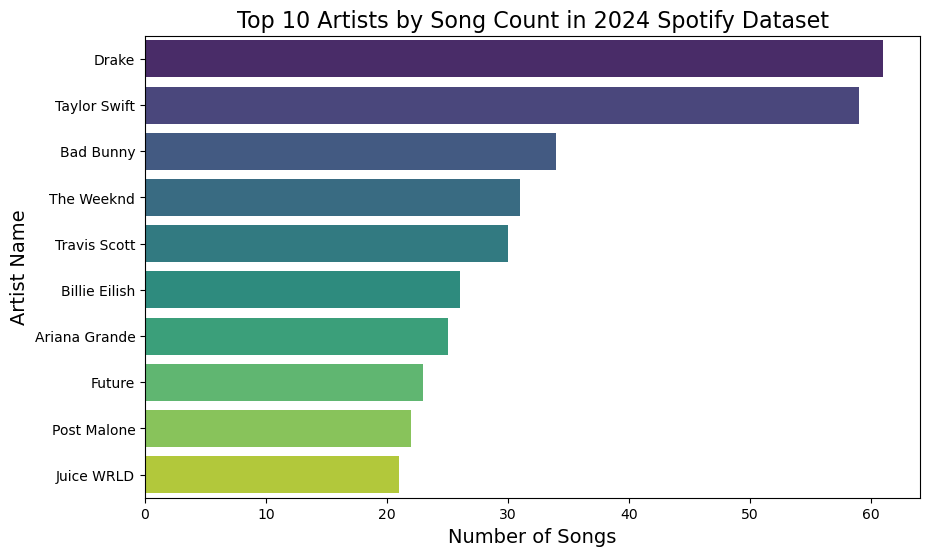

In [57]:
# Get the index of the "Artist" column
artist_column_index = 2

# Extract the artist names and ensure they are strings
artists = NumPySet[:, artist_column_index].astype(str)

# Count occurrences of each artist using NumPy
unique, counts = np.unique(artists, return_counts=True)

# Combine unique artists and their counts, then sort by count
artist_counts = np.array(list(zip(unique, counts)), dtype=[('Artist', 'U50'), ('Count', 'i4')])
sorted_artist_counts = np.sort(artist_counts, order='Count')[::-1]  # Sort descending by count

# Get the top 10 artists
top_10_artists = sorted_artist_counts[:10]

# Extract data for plotting
artist_names = [x['Artist'] for x in top_10_artists]
artist_counts = [x['Count'] for x in top_10_artists]

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x=artist_counts,
    y=artist_names,
    palette='viridis'
)
plt.title('Top 10 Artists by Song Count in 2024 Spotify Dataset', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist Name', fontsize=14)
plt.show()


### The bar chart below lists the total count of songs by artist for the most streamed songs for Spotify 2024 and with a popularity rating of at least 80 on the song to be added to the count

C:\Users\danie\AppData\Local\Temp\ipykernel_3196\3640750527.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


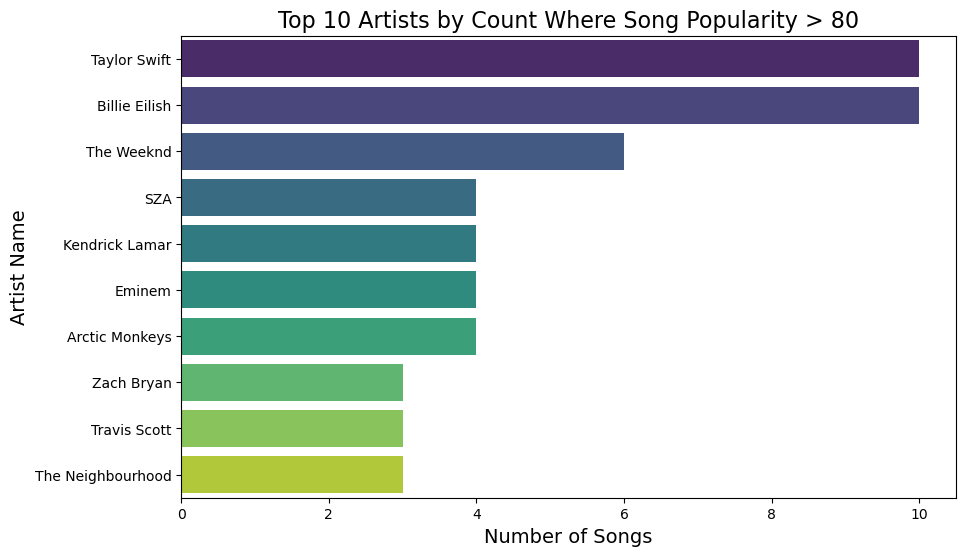

In [59]:
# Get the index of the "Artist" column
artist_column_index = 2

# Extract the artist names and ensure they are strings
artists = filtered_set[:, artist_column_index].astype(str)

# Count occurrences of each artist using NumPy
unique, counts = np.unique(artists, return_counts=True)

# Combine unique artists and their counts, then sort by count
artist_counts = np.array(list(zip(unique, counts)), dtype=[('Artist', 'U50'), ('Count', 'i4')])
sorted_artist_counts = np.sort(artist_counts, order='Count')[::-1]  # Sort descending by count

# Get the top 10 artists
top_10_artists = sorted_artist_counts[:10]

# Extract data for plotting
artist_names = [x['Artist'] for x in top_10_artists]
artist_counts = [x['Count'] for x in top_10_artists]

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x=artist_counts,
    y=artist_names,
    palette='viridis'
)
plt.title('Top 10 Artists by Count Where Song Popularity > 80', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist Name', fontsize=14)
plt.show()


### Below is the text analysis of the BBC legal article regarding the lawsuit of artist Drake against artist Kendrick Lamar over supposed inflated song plays through Spotify in 2024 for his song 'Not Like Us'

In [61]:
from bs4 import BeautifulSoup
import requests
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from nltk.tokenize import word_tokenize
import nltk
import text2emotion as t2e
from collections import Counter

scraped_data = ""
# Step 2: Send an HTTP GET request to the URL
response = requests.get("https://www.bbc.com/news/articles/cje08q8qnzqo")

# Step 3: Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 4: Find all <p> elements on the page
paragraphs = soup.find_all('p')

# Step 5: Loop through the paragraphs and extract their text
for index, p in enumerate(paragraphs, start=1):
    scraped_data += p.text.strip()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Step 1: Tokenize the text into words
words = word_tokenize(scraped_data)

# Step 2: Convert words to lowercase and remove stopwords
cleaned_data = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]
top_5 = nltk.FreqDist(cleaned_data)

top_5.tabulate(5)
print("\nMost common words in the first article are:")
for index, frequency in top_5.most_common(5):
    print(f"{index}: {frequency}\n")

print("\nLeast common words in the first article are:")
for index, frequency in top_5.most_common()[-5:]:
    print(f"{index}: {frequency}\n")

allegeCount = top_5["allege"]
allegationsCount = top_5["allegations"]
claimsCount = top_5["claims"]
print("Words relevant to topic:\n")
print(f"Allege: {allegeCount}")
print(f"Allegations: {allegationsCount}")
print(f"Claims: {claimsCount}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


    drake universal     lamar     legal     music 
       12         9         6         5         5 

Most common words in the first article are:
drake: 12

universal: 9

lamar: 6

legal: 5

music: 5


Least common words in the first article are:
content: 1

sites: 1

read: 1

approach: 1

linking: 1

Words relevant to topic:

Allege: 2
Allegations: 1
Claims: 2


In [62]:
top_5_bigrams = list(bigrams(cleaned_data))
top_5_trigrams = list(trigrams(cleaned_data))

top_5_bigrams_fd = FreqDist(top_5_bigrams)
top_5_trigrams_fd = FreqDist(top_5_trigrams)

top5bigram = top_5_bigrams_fd.most_common(5)
top5trigram = top_5_trigrams_fd.most_common(5)

print("Top 5 Most Common Word Pairs (Bigrams):")
for pair, count in top5bigram:
    print(f"Bigram: {pair}, Count: {count}")
print()
print("Top 5 Most Common Word Trios (Trigrams):")
for pair, count in top5trigram:
    print(f"Bigram: {pair}, Count: {count}")



Top 5 Most Common Word Pairs (Bigrams):
Bigram: ('drake', 'lawyers'), Count: 3
Bigram: ('diss', 'track'), Count: 2
Bigram: ('streaming', 'services'), Count: 2
Bigram: ('spokesperson', 'universal'), Count: 2
Bigram: ('offensive', 'untrue'), Count: 2

Top 5 Most Common Word Trios (Trigrams):
Bigram: ('fans', 'choose', 'music'), Count: 2
Bigram: ('choose', 'music', 'want'), Count: 2
Bigram: ('drake', 'launched', 'legal'), Count: 1
Bigram: ('launched', 'legal', 'action'), Count: 1
Bigram: ('legal', 'action', 'universal'), Count: 1


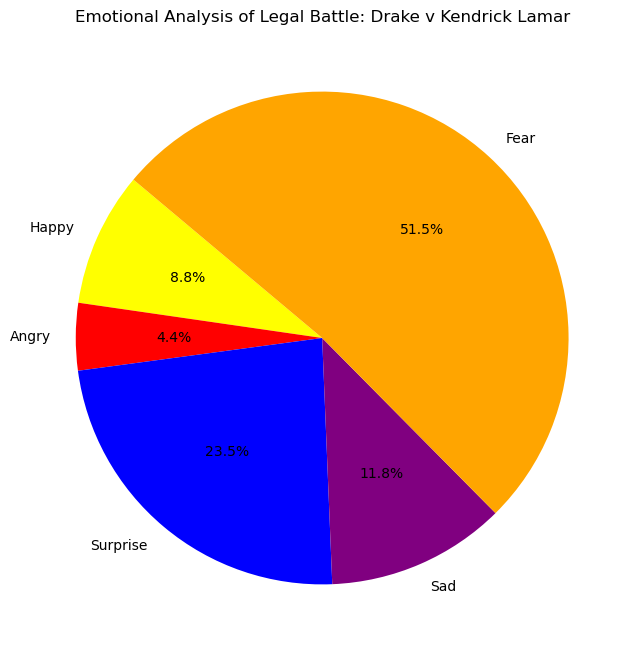

In [63]:
# Aggregate emotion scores across sentences
overall_emotions = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
for sentence in cleaned_data:
    emotion_score = t2e.get_emotion(sentence)
    for emotion, score in emotion_score.items():
        overall_emotions[emotion] += score

# Prepare data for the pie chart
labels = list(overall_emotions.keys())
sizes = list(overall_emotions.values())
colors = ['yellow', 'red', 'blue', 'purple', 'orange']  # Custom colors for emotions

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Display percentages
    startangle=140,  # Rotate pie chart
    colors=colors  # Add custom colors
)
plt.title('Emotional Analysis of Legal Battle: Drake v Kendrick Lamar')
plt.show()

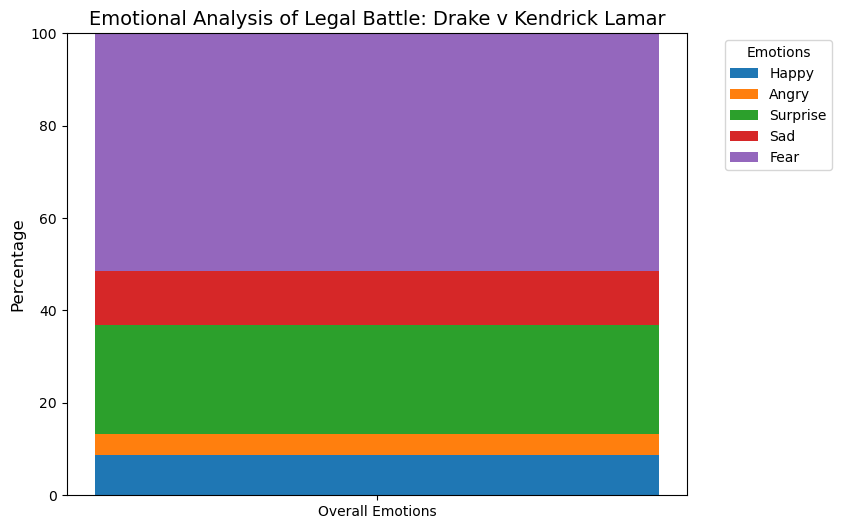

In [64]:
# Aggregate emotion scores across sentences
overall_emotions = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
for sentence in cleaned_data:
    emotion_score = t2e.get_emotion(sentence)
    for emotion, score in emotion_score.items():
        overall_emotions[emotion] += score

# Normalize the emotion scores to percentages
total = sum(overall_emotions.values())
normalized_emotions = {emotion: (score / total) * 100 for emotion, score in overall_emotions.items()}

# Data for the stacked bar chart
labels = ['Overall Emotions']  # Single bar to represent all emotions
data = list(normalized_emotions.values())  # Values of the emotions
categories = list(normalized_emotions.keys())  # Emotion names

# Plot the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bottom = 0  # Start stacking from the bottom
for i, value in enumerate(data):
    ax.bar(
        labels,
        value,
        bottom=bottom,
        label=categories[i]
    )
    bottom += value  # Update the bottom position for the next stack

# Add labels and title
ax.set_title('Emotional Analysis of Legal Battle: Drake v Kendrick Lamar', fontsize=14)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_ylim(0, 100)
ax.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()

### Below is the text analysis of the Forbes article regarding the the Spotify Wrapped 2024 release controversy amid user disappointment of the lack of detailed metrics based on year 2024 song performance ratings

In [66]:


scraped_data = ""
# Step 2: Send an HTTP GET request to the URL
response = requests.get("https://www.forbes.com/sites/danidiplacido/2024/12/05/spotify-wrapped-2024-backlash-controversy-and-memes/")

# Step 3: Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 4: Find all <p> elements on the page
paragraphs = soup.find_all('p')

# Step 5: Loop through the paragraphs and extract their text
for index, p in enumerate(paragraphs, start=1):
    scraped_data += p.text.strip()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Step 1: Tokenize the text into words
words = word_tokenize(scraped_data)

# Step 2: Convert words to lowercase and remove stopwords
cleaned_data = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]
top_5 = nltk.FreqDist(cleaned_data)

top_5.tabulate(5)
print("\nMost common words in the first article are:")
for index, frequency in top_5.most_common(5):
    print(f"{index}: {frequency}\n")

print("\nLeast common words in the first article are:")
for index, frequency in top_5.most_common()[-5:]:
    print(f"{index}: {frequency}\n")

genreCount = top_5["genre"]
botsCount = top_5["bots"]
playlistCount = top_5["playlist"]
print("Words relevant to topic:\n")
print(f"Genre: {genreCount}")
print(f"Bots: {botsCount}")
print(f"Playlist: {playlistCount}")

  spotify   wrapped listeners      year        ai 
       18        12        10         7         6 

Most common words in the first article are:
spotify: 18

wrapped: 12

listeners: 10

year: 7

ai: 6


Least common words in the first article are:
thanks: 1

reading: 1

guidelines: 1

read: 1

found: 1

Words relevant to topic:

Genre: 0
Bots: 1
Playlist: 1


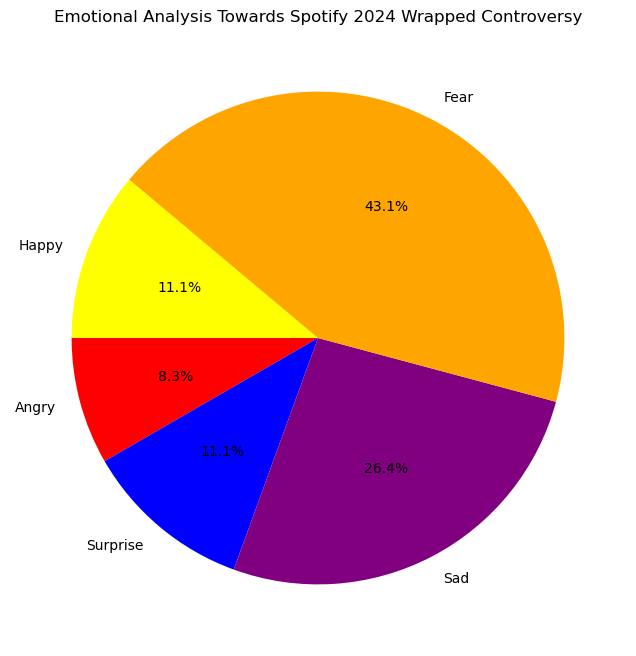

In [67]:
# Aggregate emotion scores across sentences
overall_emotions = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
for sentence in cleaned_data:
    emotion_score2 = t2e.get_emotion(sentence)
    for emotion, score in emotion_score2.items():
        overall_emotions[emotion] += score

# Prepare data for the pie chart
labels = list(overall_emotions.keys())
sizes = list(overall_emotions.values())
colors = ['yellow', 'red', 'blue', 'purple', 'orange']  # Custom colors for emotions

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Display percentages
    startangle=140,  # Rotate pie chart
    colors=colors  # Add custom colors
)
plt.title('Emotional Analysis Towards Spotify 2024 Wrapped Controversy')
plt.show()

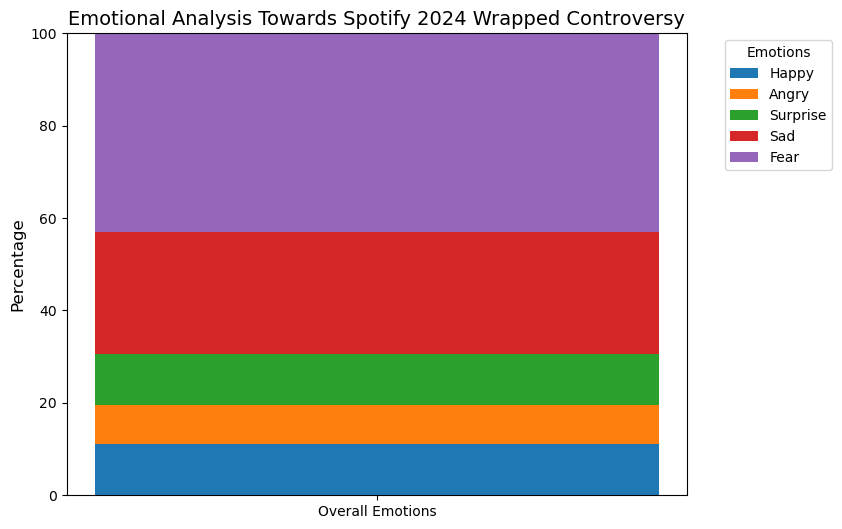

In [68]:
# Aggregate emotion scores across sentences
overall_emotions = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
for sentence in cleaned_data:
    emotion_score = t2e.get_emotion(sentence)
    for emotion, score in emotion_score.items():
        overall_emotions[emotion] += score

# Normalize the emotion scores to percentages
total = sum(overall_emotions.values())
normalized_emotions = {emotion: (score / total) * 100 for emotion, score in overall_emotions.items()}

# Data for the stacked bar chart
labels = ['Overall Emotions']  # Single bar to represent all emotions
data = list(normalized_emotions.values())  # Values of the emotions
categories = list(normalized_emotions.keys())  # Emotion names

# Plot the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bottom = 0  # Start stacking from the bottom
for i, value in enumerate(data):
    ax.bar(
        labels,
        value,
        bottom=bottom,
        label=categories[i]
    )
    bottom += value  # Update the bottom position for the next stack

# Add labels and title
ax.set_title('Emotional Analysis Towards Spotify 2024 Wrapped Controversy', fontsize=14)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_ylim(0, 100)
ax.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()

In [69]:
clean_data_three

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Explicit Track,Track Score Binned,Spotify Popularity Binned
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,3.904709e+08,30716.0,"196,631,588",92.0,0,<800,<100
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,3.237039e+08,28113.0,"174,597,137",92.0,1,<600,<100
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,6.013093e+08,54331.0,"211,607,669",92.0,0,<600,<100
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2.031281e+09,269802.0,"136,569,078",85.0,0,<500,<90
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,1.070349e+08,7223.0,"151,469,874",88.0,1,<500,<90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,"Jaragandi (From ""Game Changer"") (Telugu)","Jaragandi (From ""Game Changer"") (Telugu)",Thaman S,3/27/2024,"4,587",19.4,3.754914e+06,101.0,"1,306,604",0.0,0,<100,NaN
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,"4,585",19.4,3.050500e+08,65770.0,"5,103,054",71.0,1,<100,<80
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,"4,575",19.4,5.228236e+07,4602.0,"1,449,767",56.0,0,<100,<60
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,"4,571",19.4,1.899727e+08,72066.0,"6,704,802",65.0,1,<100,<70
